In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data1_1 = pd.DataFrame({
    'x1': np.random.normal(1, .5, 1000), 
    'x2': np.random.normal(1, .5, 1000), 
    'y': 1
})
data1_2 = pd.DataFrame({
    'x1': np.random.normal(-1, .5, 10), 
    'x2': np.random.normal(-1, .5, 10), 
    'y': -1
})
data2_1 = pd.DataFrame({
    'x1': np.random.normal(1, .5, 100), 
    'x2': np.random.normal(1, .5, 100), 
    'y': 1
})
data2_2 = pd.DataFrame({
    'x1': np.random.normal(-1, .5, 100), 
    'x2': np.random.normal(-1, .5, 100), 
    'y': -1
})
data1_df = pd.concat([data1_1, data1_2], axis=0).reset_index(drop=True)
data2_df = pd.concat([data2_1, data2_2], axis=0).reset_index(drop=True)

In [91]:
def forward_pass(inputs, W):
    net = np.dot(inputs, W[:-1]) + W[-1]
    if net >= 0:
        h = 1
    else:
        h = -1
    return net, h

In [92]:
def forward_pass_tanh(inputs, W):
    net = np.dot(inputs, W[:-1]) + W[-1]
    h = np.tanh(net)
    return net, h

In [110]:
def train_perceptron(X_train, y_train, gradient=False):
    lamda = 1
    W = np.zeros(X_train.shape[1] + 1)
    lr = .001
    epochs = 1
    while True:
        errors = []
        epochs += 1
        for index in X_train.index:
            if gradient:
                net, h = forward_pass_tanh(X_train.loc[index], W)
                error = 0.5*(y_train.loc[index] - np.tanh(lamda*net)) ** 2
                W[:-1] += lr*(1 - h**2)*lamda*(y_train.loc[index] - h)*X_train.loc[index]
                W[-1] += lr*(1 - h**2)*lamda*(y_train.loc[index] - h)

            else:
                net, h = forward_pass(X_train.loc[index], W)
                error = y_train.loc[index] - net
                W[:-1] += lr*error*X_train.loc[index]
                W[-1] += lr*error
                
                
            errors.append(error)


        if not any(errors) or epochs > 100:
            break
        if epochs % 10 == 0:
            print('epoch: {}'.format(epochs))
            print('sum of errors: {}'.format(sum(errors)))
    return W

In [94]:
def plot_dividing_lines(x, y, ax, points):
    sns.scatterplot(data=points, x='x1', y='x2', alpha=0.8, hue='y', palette='flare', ax=ax)
    sns.lineplot(x=x, y=y, color='black', ax=ax)

In [95]:
def find_dividing_line(X_train, y_train, df, gradient):
    W = train_perceptron(X_train, y_train, gradient)
    x1_min, x1_max = min(df['x1']), max(df['x1'])
    x = np.linspace(x1_min, x1_max, num=10000)
    y = (-W[0]*x - W[-1]) / W[1]
    return W, x, y

In [96]:
def find_misclassifieds(W, X_train, y_train):
    misclassified_indices = []
    for index in X_train.index:
        net, h = forward_pass(X_train.loc[index], W)
        if h != y_train.loc[index]:
            misclassified_indices.append(index)
    return misclassified_indices

epoch: 10
sum of errors: 18.876104824511792
epoch: 20
sum of errors: 6.636791832471534
epoch: 30
sum of errors: 2.3349389100181797
epoch: 40
sum of errors: 0.821583274304934
epoch: 50
sum of errors: 0.2890948523885899
epoch: 60
sum of errors: 0.10172597817541318
epoch: 70
sum of errors: 0.03579513333010009
epoch: 80
sum of errors: 0.012595523502083816
epoch: 90
sum of errors: 0.004432089160476771
epoch: 100
sum of errors: 0.0015595552337039909
epoch: 10
sum of errors: -2.2920685805407612
epoch: 20
sum of errors: -0.4094409574994583
epoch: 30
sum of errors: -0.08060181007378753
epoch: 40
sum of errors: -0.026079651077144828
epoch: 50
sum of errors: -0.012842670430874503
epoch: 60
sum of errors: -0.007455439753130344
epoch: 70
sum of errors: -0.00451872868704839
epoch: 80
sum of errors: -0.002766059524182407
epoch: 90
sum of errors: -0.001696928391554442
epoch: 100
sum of errors: -0.0010415417935352167


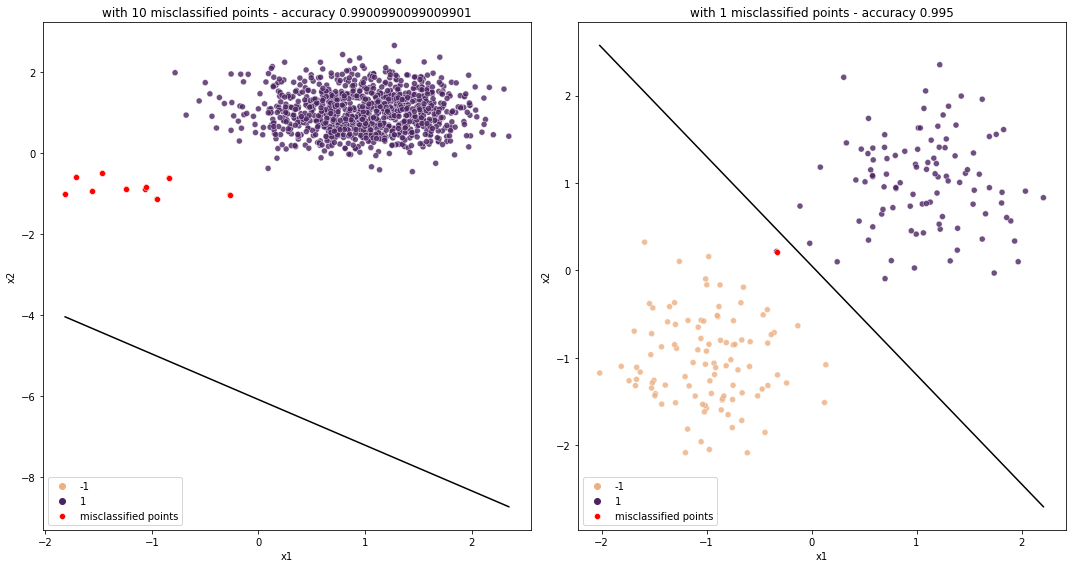

In [97]:
fig = plt.figure(figsize=(15, 8))
for ax_index, data_df in enumerate([data1_df, data2_df]):
    X_train = data_df[['x1', 'x2']]
    y_train = data_df['y']
    W, x, y = find_dividing_line(X_train, y_train, data_df, gradient=False)
    ax = plt.subplot(1, 2, ax_index + 1)
    misclassified_indices = find_misclassifieds(W, X_train, y_train)
    plot_dividing_lines(x, y, ax, data_df)
    if len(misclassified_indices):
        sns.scatterplot(data=X_train.loc[misclassified_indices], x='x1', y='x2', ax=ax, color='red', label='misclassified points')
    ax.set_title('with {} misclassified points - accuracy {}'
                 .format(
                     len(misclassified_indices), (X_train.shape[0] - len(misclassified_indices)) / X_train.shape[0])
                )
    plt.tight_layout()

epoch: 10
sum of errors: 6.80872441174216
epoch: 20
sum of errors: 3.8382311292929314
epoch: 30
sum of errors: 2.8307662437179504
epoch: 40
sum of errors: 2.294939530561066
epoch: 50
sum of errors: 1.9536948819695612
epoch: 60
sum of errors: 1.714007914019182
epoch: 70
sum of errors: 1.5349085163700746
epoch: 80
sum of errors: 1.3952248589815759
epoch: 90
sum of errors: 1.282792547555565
epoch: 100
sum of errors: 1.1900731252000634
epoch: 10
sum of errors: 9.69457985294024
epoch: 20
sum of errors: 5.620780748130418
epoch: 30
sum of errors: 4.277078259808808
epoch: 40
sum of errors: 3.5775851199712814
epoch: 50
sum of errors: 3.1367444400998825
epoch: 60
sum of errors: 2.8277188109471143
epoch: 70
sum of errors: 2.5958999042897015
epoch: 80
sum of errors: 2.4136589061858946
epoch: 90
sum of errors: 2.2654089375703546
epoch: 100
sum of errors: 2.1416350682439407


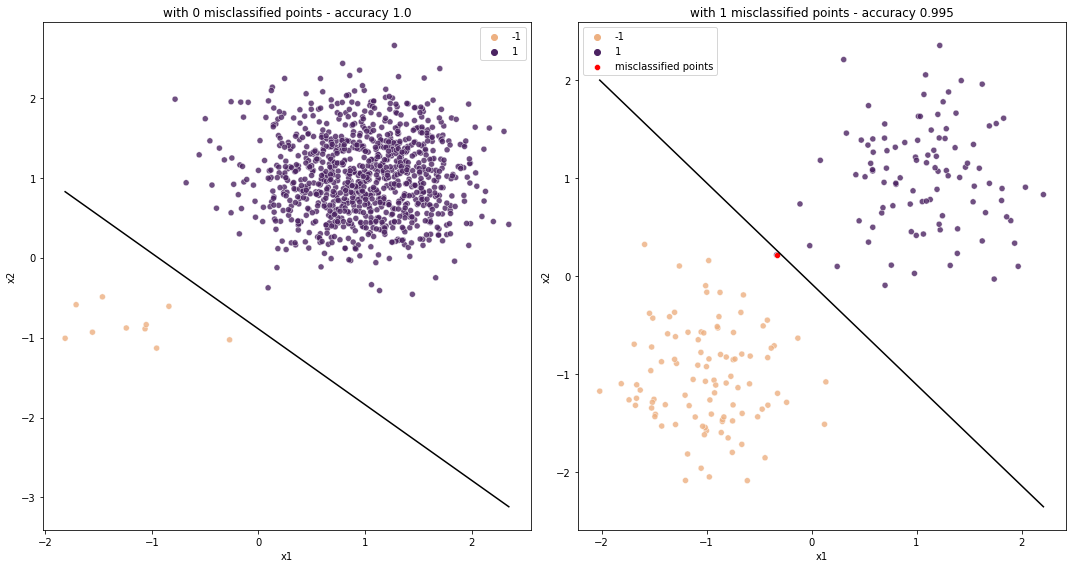

In [111]:
fig = plt.figure(figsize=(15, 8))
for ax_index, data_df in enumerate([data1_df, data2_df]):
    X_train = data_df[['x1', 'x2']]
    y_train = data_df['y']
    W, x, y = find_dividing_line(X_train, y_train, data_df, gradient=True)
    ax = plt.subplot(1, 2, ax_index + 1)
    misclassified_indices = find_misclassifieds(W, X_train, y_train)
    plot_dividing_lines(x, y, ax, data_df)
    if len(misclassified_indices):
        sns.scatterplot(data=X_train.loc[misclassified_indices], x='x1', y='x2', ax=ax, color='red', label='misclassified points')
    ax.set_title('with {} misclassified points - accuracy {}'
                 .format(
                     len(misclassified_indices), (X_train.shape[0] - len(misclassified_indices)) / X_train.shape[0])
                )
    plt.tight_layout()